# Data analysis with Pandas
***
Importing, cleaning and analyzing the "hotel booking demand" dataset from Kaggle, which is available [here](https://www.kaggle.com/jessemostipak/hotel-booking-demand).

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Downloading the dataset

!kaggle datasets download -d jessemostipak/hotel-booking-demand
!unzip hotel-booking-demand.zip
!rm hotel-booking-demand.zip

In [9]:
# Loading the dataset and checking some of its features

dataset = pd.read_csv("hotel_bookings.csv")

dataset.head()
#dataset.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [103]:
# As a safety precaution, and following best practices, the analysis will not be conducted on the original dataset
# Instead, we'll create a deep copy of the original dataset and use it for our analysis

hotel_bookings = dataset.copy(deep=True)

In [104]:
# We've noticed that there are null values in this dataset. However, how many are there?

null_data = hotel_bookings.isna()
null_total = null_data.sum().sum()
null_relative = null_total/hotel_bookings.size

print(f"Total number of null features: {null_total}")
print(f"% of null features relative to the overall data: {np.round(null_relative * 100, 3)}%")

Total number of null features: 129425
% of null features relative to the overall data: 3.388%


In [105]:
# It seems that roughly 3.4% of our data is null
# Although it may seem insignificant, we need to know which columns are being affected by this

null_data.columns[null_data.any()]

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [106]:
# With this information, what is the ratio of each column's null to filled values?

null_children = null_data.children.mean()
null_country = null_data.country.mean()
null_agent = null_data.agent.mean()
null_company = null_data.company.mean()

print(f"% of null values in the children column: {np.round(null_children * 100, 3)}%")
print(f"% of null values in the country column: {np.round(null_country * 100, 3)}%")
print(f"% of null values in the agent column: {np.round(null_agent * 100, 3)}%")
print(f"% of null values in the company column: {np.round(null_company * 100, 3)}%")

% of null values in the children column: 0.003%
% of null values in the country column: 0.409%
% of null values in the agent column: 13.686%
% of null values in the company column: 94.307%


## Dealing with the null columns
***
Now, the question is: should these columns be cleaned? It depends. However, in this scenario, having things such as a null amount of children and null country could mean that the information is unknown. Alternatively, it could mean that the information is truly missing, i.e. someone forgot to add it in or it was corrupted somehow.

Still, leaving ```NaN``` values doesn't help us either. Thus, we must change this if we are to extract meaningful data from this dataset. We can think about it the following way:

* Having a ```NaN``` amount of children could mean that the person has no children, or has 1 or more. However, given we don't know that, we could assign the number 0 to those null values as, either way, they won't affect our data analysis, yet having a numerical value is preferable.

* Being from a ```NaN``` country could mean, as stated previously, that the information was lost or is unknown. However, rather than having a null value, we could replace all of those ```NaN``` with ```UNK```, thus preserving the original data structure and getting rid of null values at the same time.

* Having a ```NaN``` agent ID could, once again, mean that the information was lost or is unknown. As it's a numerical value, and as it represents a travel agency ID, we could use the number 0 to denote this lack of information, as no agency has 0 as its ID.

* A ```NaN``` company ID could mean that the person truly doesn't work at a company, or that the information was lost (missing or corrupted). Once again, assigning 0 to a null company ID will have the same effect, given no company has such an ID.

In [107]:
# Replacing all NaNs with appropriate values

hotel_bookings.children.fillna(0, inplace=True)
hotel_bookings.country.fillna("UNK", inplace=True)
hotel_bookings.agent.fillna(0, inplace=True)
hotel_bookings.company.fillna(0, inplace=True)

In [108]:
# Checking some samples from our cleaned dataframe

hotel_bookings.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
24000,Resort Hotel,0,45,2016,May,20,8,2,0,2,...,No Deposit,393.0,0.0,0,Transient-Party,64.60,1,1,Check-Out,2016-05-10
102293,City Hotel,0,1,2016,November,48,25,0,1,2,...,No Deposit,9.0,0.0,0,Transient,181.00,0,2,Check-Out,2016-11-26
70696,City Hotel,1,123,2017,June,25,21,0,3,3,...,No Deposit,9.0,0.0,0,Transient,178.00,0,0,Canceled,2017-05-10
13635,Resort Hotel,1,77,2017,August,34,24,0,3,2,...,Non Refund,0.0,0.0,0,Transient,198.00,0,0,Canceled,2017-06-12
21469,Resort Hotel,0,24,2016,February,9,26,1,2,2,...,No Deposit,240.0,0.0,0,Transient,48.00,0,2,Check-Out,2016-02-29
110885,City Hotel,0,78,2017,May,18,1,1,1,2,...,No Deposit,14.0,0.0,0,Transient,108.00,0,3,Check-Out,2017-05-03
118639,City Hotel,0,230,2017,August,33,18,2,4,2,...,No Deposit,7.0,0.0,0,Transient,72.86,0,1,Check-Out,2017-08-24
30096,Resort Hotel,0,50,2016,November,46,9,1,4,1,...,No Deposit,6.0,0.0,0,Transient,46.70,1,0,Check-Out,2016-11-14
101878,City Hotel,0,41,2016,November,47,18,0,2,3,...,No Deposit,9.0,0.0,0,Transient,140.00,0,1,Check-Out,2016-11-20
114654,City Hotel,0,126,2017,June,25,23,0,2,2,...,No Deposit,9.0,0.0,0,Transient-Party,117.00,0,0,Check-Out,2017-06-25


## Additional cleaning
***
We can do some more cleaning on this dataframe. For instance, the ```children```, ```agent``` and ```company``` columns are of type float while they'd be better suited for the integer data type. Additionally, ```arrival_date_year```, ```arrival_date_month``` and ```arrival_date_day_of_month``` could be combined into a single column called ```arrival_date```


In [109]:
# Changing the data type of children, agent and company

change_columns = ["children", "agent", "company"]

hotel_bookings[change_columns] = hotel_bookings[change_columns].astype(int)

In [110]:
# Creating a datetime column from the day, month and year columns

columns = ["arrival_date_day_of_month", "arrival_date_month", "arrival_date_year"]
new_columns = ["day", "month", "year"]

arrival_date = hotel_bookings[columns]
arrival_date.columns = new_columns
arrival_date.month = pd.to_datetime(arrival_date.month, format='%B').dt.month
arrival_date.insert(0, "arrival_date", pd.to_datetime(arrival_date[new_columns].copy(), format="%mm/%dd/%YYYY").dt.date)

arrival_date.drop(["day", "month", "year"], axis=1, inplace=True)

arrival_date.sample(10)

,arrival_date
80765,2016-04-13
49789,2016-04-19
91134,2016-06-15
108469,2017-03-25
64986,2017-03-21
1334,2015-08-24
15651,2015-07-25
22247,2016-03-16
92512,2016-07-02
78564,2016-01-28


In [111]:
# Now, all we need to do is insert the new column on our dataframe and drop the old ones

columns_to_drop = ["arrival_date_day_of_month", "arrival_date_month", "arrival_date_year"]

hotel_bookings.insert(3, "arrival_date", arrival_date)
hotel_bookings.drop(hotel_bookings[columns_to_drop], axis=1, inplace=True)

hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,27,0,0,2,0,0,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,27,0,0,2,0,0,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,27,0,1,1,0,0,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,27,0,1,1,0,0,...,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,27,0,2,2,0,0,...,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [118]:
# Saving the cleaned dataset to a .csv file

hotel_bookings.to_csv("../datasets/cleaned_hotel_bookings.csv", index=False)

## Exploratory data analysis
***
Now that the dataframe has been properly cleaned and saved, it's ready for analysis. As such, now we can conduct statistical measurements on our data and plot information that is relevant to us.

In [114]:
# 1st statistical measurement: what's the number of people that have visited the hotels in our dataset? And 
# what is the proportion of adults relative to the overall population in our data?

columns = ["adults", "children", "babies", "hotel"]

total_people = hotel_bookings[columns].groupby("hotel").sum()
hotel_population = hotel_bookings[columns[0:3]].sum().sum()
adults_ratio = hotel_bookings.adults.sum().sum()/hotel_population

print(f"Average number of adults per hotel type: \n{np.round(total_people, 2)}")
print(f"% of adults in population: {np.round(adults_ratio * 100, 2)}")

Average number of adults per hotel type: 
              adults  children  babies
hotel                                 
City Hotel    146838      7248     392
Resort Hotel   74798      5155     557
% of adults in population: 94.32


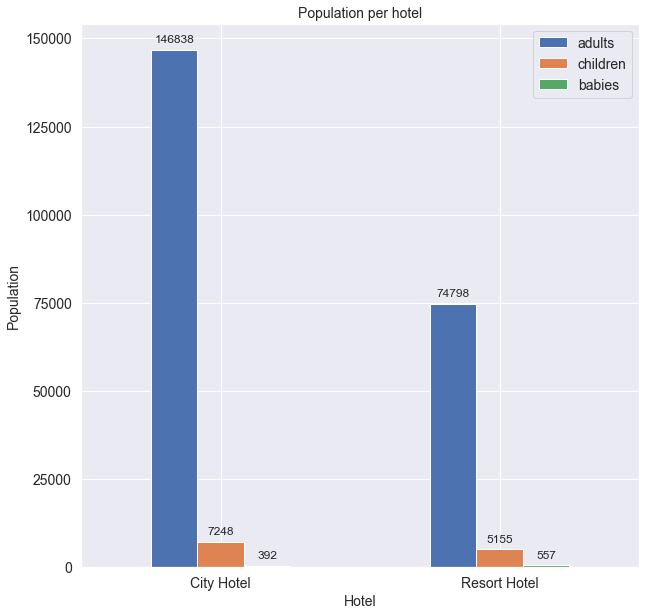

In [115]:
# As expected, adults constitute a majority of our population
# We can plot our results to get a clearer picture of our data

sns.set_theme()

ticks = np.arange(0, 175000, 25000)

ax = total_people.plot(kind="bar",
                  figsize=(10,10),
                  legend=True,
                  fontsize=14,
                  rot=0
                 )

ax.set_title("Population per hotel", fontsize=14)
ax.set_yticks(ticks)
ax.set_xlabel("Hotel", fontsize=14)
ax.legend(loc=1, prop={"size": 14})
ax.set_ylabel("Population", fontsize=14)

for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), ha="center", va="center", xytext=(0, 10), textcoords='offset points')

In [116]:
# 2nd statistical measurement: what is the arrival rate by date? 
# Which date had the most arrivals?

arrival_by_date = pd.Series(hotel_bookings["arrival_date"])
frequency = arrival_by_date.value_counts() 

print(f"Arrival by date: \n{frequency}")

Arrival by date: 
2015-12-05    448
2016-11-07    366
2015-10-16    356
2016-10-13    344
2015-09-18    340
             ... 
2015-12-15     29
2015-11-15     28
2015-12-07     27
2015-11-29     20
2015-12-13     19
Name: arrival_date, Length: 793, dtype: int64


Text(0, 0.5, 'Number of hotels')

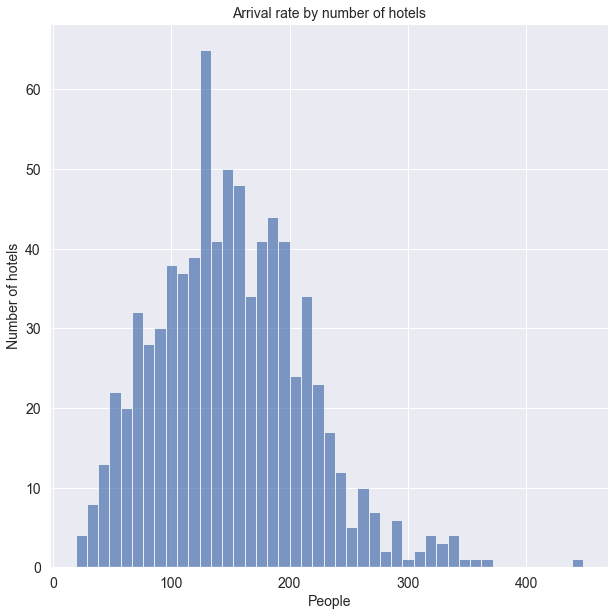

In [117]:
# It seems that December 5th, 2015 had the most arrivals
# Let's use a histogram to plot our results

x = np.arange(0, 500, 50)

ax = frequency.plot(kind="hist",
                    figsize=(10,10),
                    bins=45,
                    alpha=0.7,
                    legend=False,
                    fontsize=14,
                    rot=0
                   )

ax.set_title("Arrival rate by number of hotels", fontsize=14)
ax.set_xlabel("People", fontsize=14)
ax.set_ylabel("Number of hotels", fontsize=14)
